In [2]:
# import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('19981201 Open Electricity.csv')

In [3]:
data.head(5)
#data.info()

,date,Battery (Charging) - GWh,Pumps - GWh,Coal (Brown) - GWh,Coal (Black) - GWh,Bioenergy (Biomass) - GWh,Distillate - GWh,Gas (Steam) - GWh,Gas (CCGT) - GWh,Gas (OCGT) - GWh,...,Gas (Steam) Market Value - AUD,Gas (CCGT) Market Value - AUD,Gas (OCGT) Market Value - AUD,Gas (Reciprocating) Market Value - AUD,Gas (Waste Coal Mine) Market Value - AUD,Battery (Discharging) Market Value - AUD,Hydro Market Value - AUD,Wind Market Value - AUD,Solar (Utility) Market Value - AUD,Solar (Rooftop) Market Value - AUD
0,1998-12-01,0.0,-24.36,3277.81,6472.65,0.0,15.22,233.59,171.45,71.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1999-01-01,0.0,-42.41,4351.95,8146.82,0.0,3.58,349.21,216.67,108.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1999-02-01,0.0,-21.76,4153.15,7545.69,0.0,2.11,349.69,203.70,110.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1999-03-01,0.0,-64.14,4622.72,8217.25,0.0,11.16,253.31,235.47,124.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1999-04-01,0.0,-18.47,4204.93,7707.56,0.0,1.74,350.19,221.98,87.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# clean up the data
# all the columns are numeric, only datetime needs fixing
data['date'] = pd.to_datetime(data['date'])

# set the date as index
data.set_index('date', inplace=True)

In [5]:
for col in data.columns:
    print(col)

Battery (Charging) -  GWh
Pumps -  GWh
Coal (Brown) -  GWh
Coal (Black) -  GWh
Bioenergy (Biomass) -  GWh
Distillate -  GWh
Gas (Steam) -  GWh
Gas (CCGT) -  GWh
Gas (OCGT) -  GWh
Gas (Reciprocating) -  GWh
Gas (Waste Coal Mine) -  GWh
Battery (Discharging) -  GWh
Hydro -  GWh
Wind -  GWh
Solar (Utility) -  GWh
Solar (Rooftop) -  GWh
Coal (Brown) Emissions Vol - tCO₂e
Coal (Black) Emissions Vol - tCO₂e
Bioenergy (Biomass) Emissions Vol - tCO₂e
Distillate Emissions Vol - tCO₂e
Gas (Steam) Emissions Vol - tCO₂e
Gas (CCGT) Emissions Vol - tCO₂e
Gas (OCGT) Emissions Vol - tCO₂e
Gas (Reciprocating) Emissions Vol - tCO₂e
Gas (Waste Coal Mine) Emissions Vol - tCO₂e
Emissions Intensity - kgCO₂e/MWh
Volume Weighted Price - AUD/MWh
Battery (Charging) Market Value - AUD
Pumps Market Value - AUD
Coal (Brown) Market Value - AUD
Coal (Black) Market Value - AUD
Bioenergy (Biomass) Market Value - AUD
Distillate Market Value - AUD
Gas (Steam) Market Value - AUD
Gas (CCGT) Market Value - AUD
Gas (OCGT) M

## Recycle From Yesterday

As we went through yesterday, the data is in good shape and there are three broad groupings. Before diving into emission intensity and market value, let's look at how the data looks overtime. 

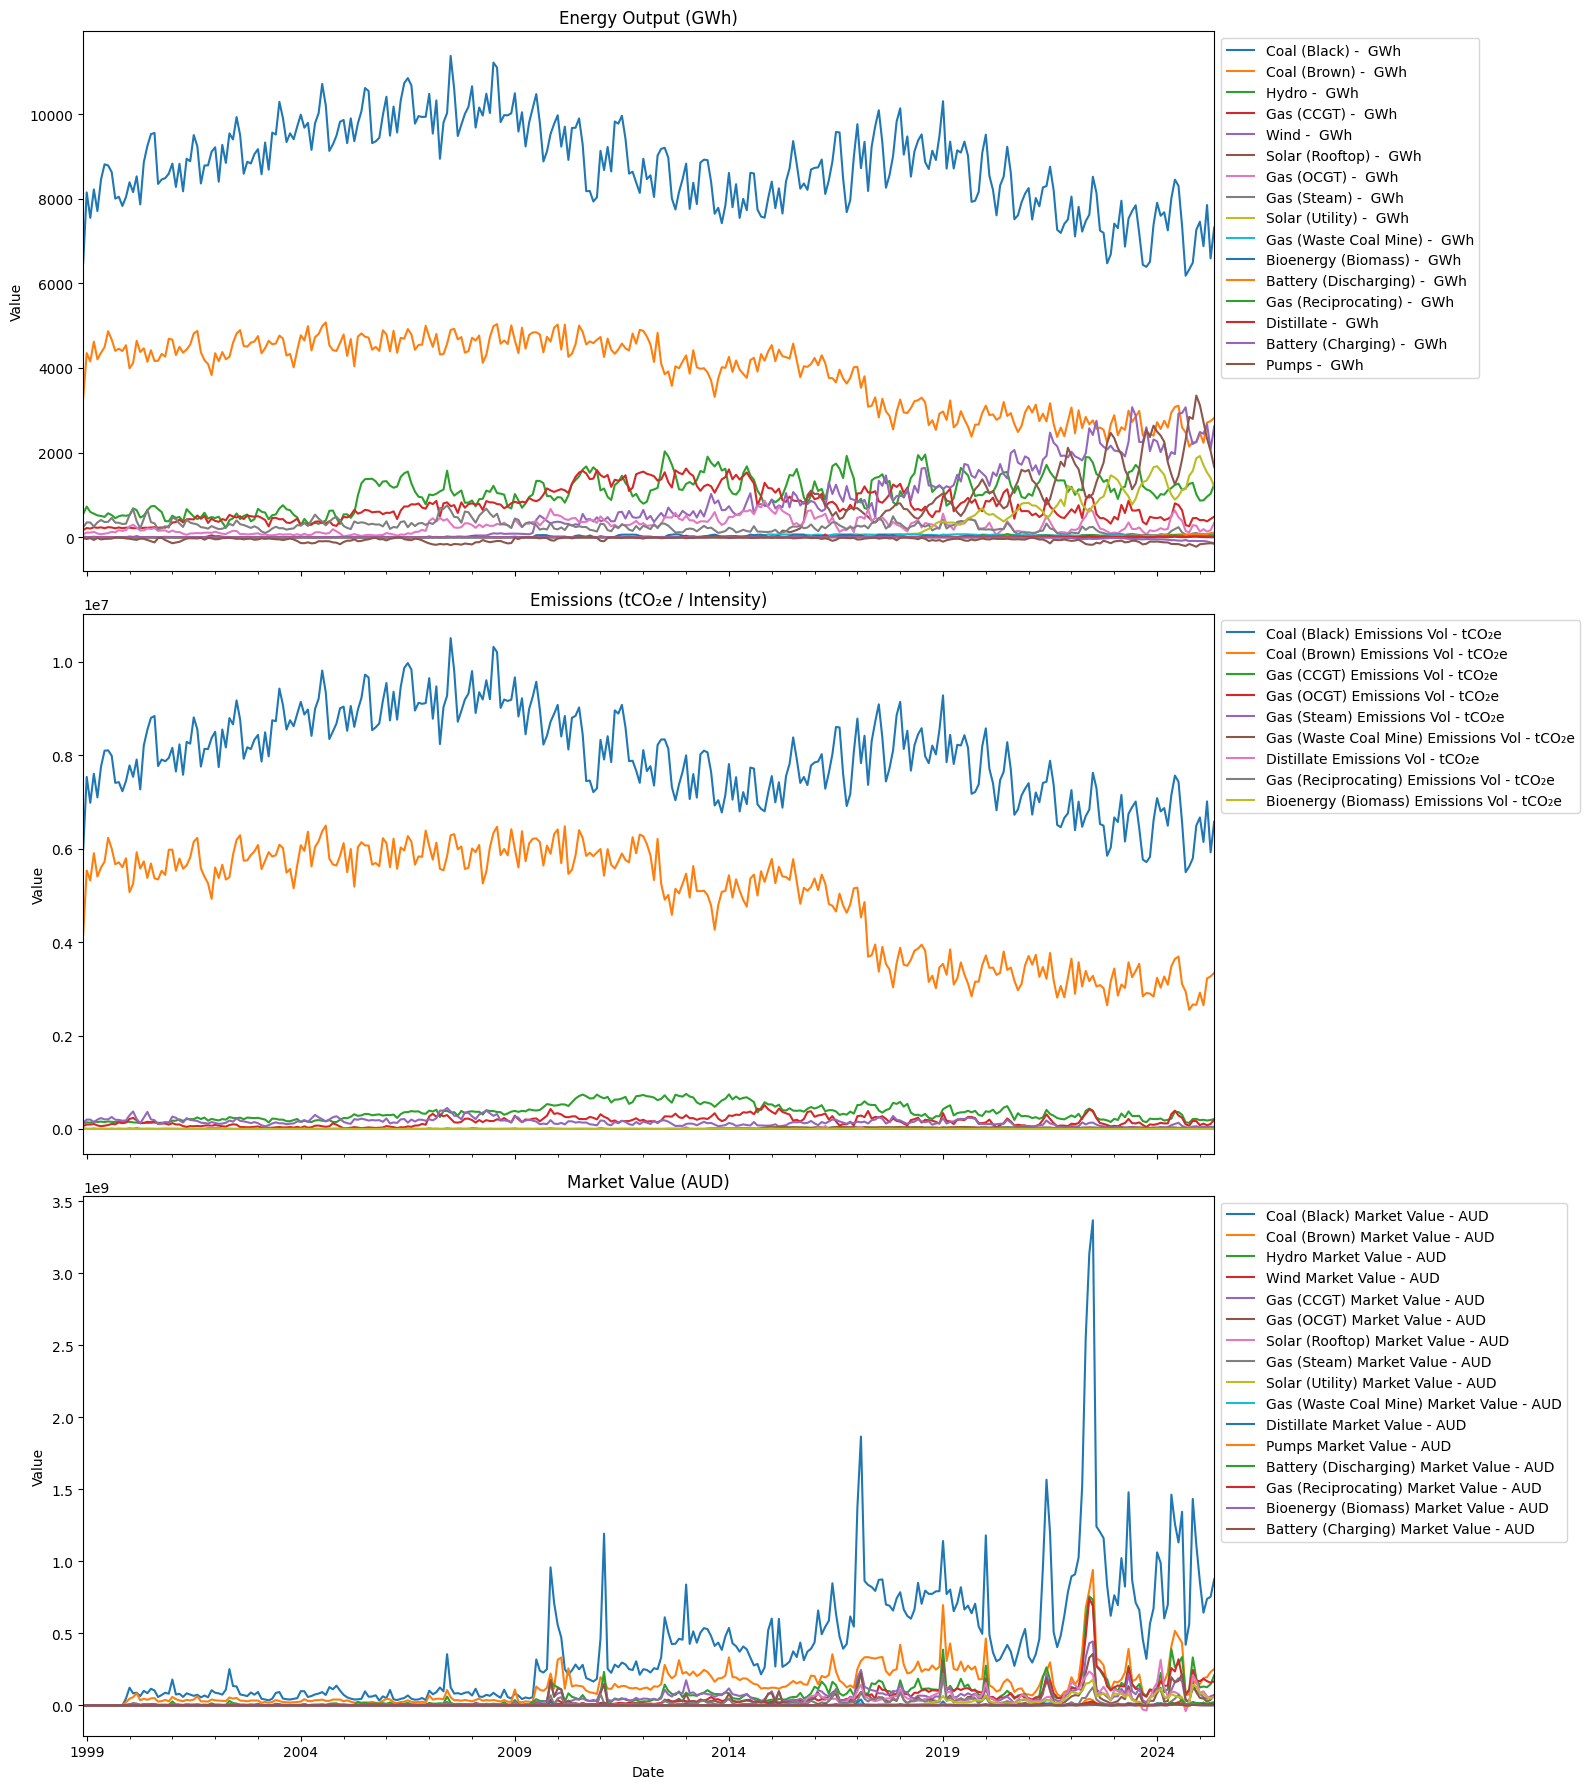

In [6]:
# let's plot groups of this data as it all appears to follow three groupings
gwh_cols = [col for col in data.columns if col.endswith("GWh")]
emissions_cols = [col for col in data.columns if col.endswith("tCO₂e")]
aud_cols = [col for col in data.columns if col.endswith("AUD")]

# sort the legend
sorted_gwh = data[gwh_cols].mean().sort_values(ascending=False).index.tolist()
sorted_emissions = data[emissions_cols].mean().sort_values(ascending=False).index.tolist()
sorted_aud = data[aud_cols].mean().sort_values(ascending=False).index.tolist()

# build the plot
fig, axes = plt.subplots(3, 1, figsize=(16, 18), sharex=True)

# plot the groupings
data[sorted_gwh].plot(ax=axes[0], title="Energy Output (GWh)", linewidth=1.5)
data[sorted_emissions].plot(ax=axes[1], title="Emissions (tCO₂e / Intensity)", linewidth=1.5)
data[sorted_aud].plot(ax=axes[2], title="Market Value (AUD)", linewidth=1.5)


# tidy up the plot
for ax in axes:
    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    ax.set_ylabel("Value")
axes[2].set_xlabel("Date")
plt.tight_layout()
plt.show()

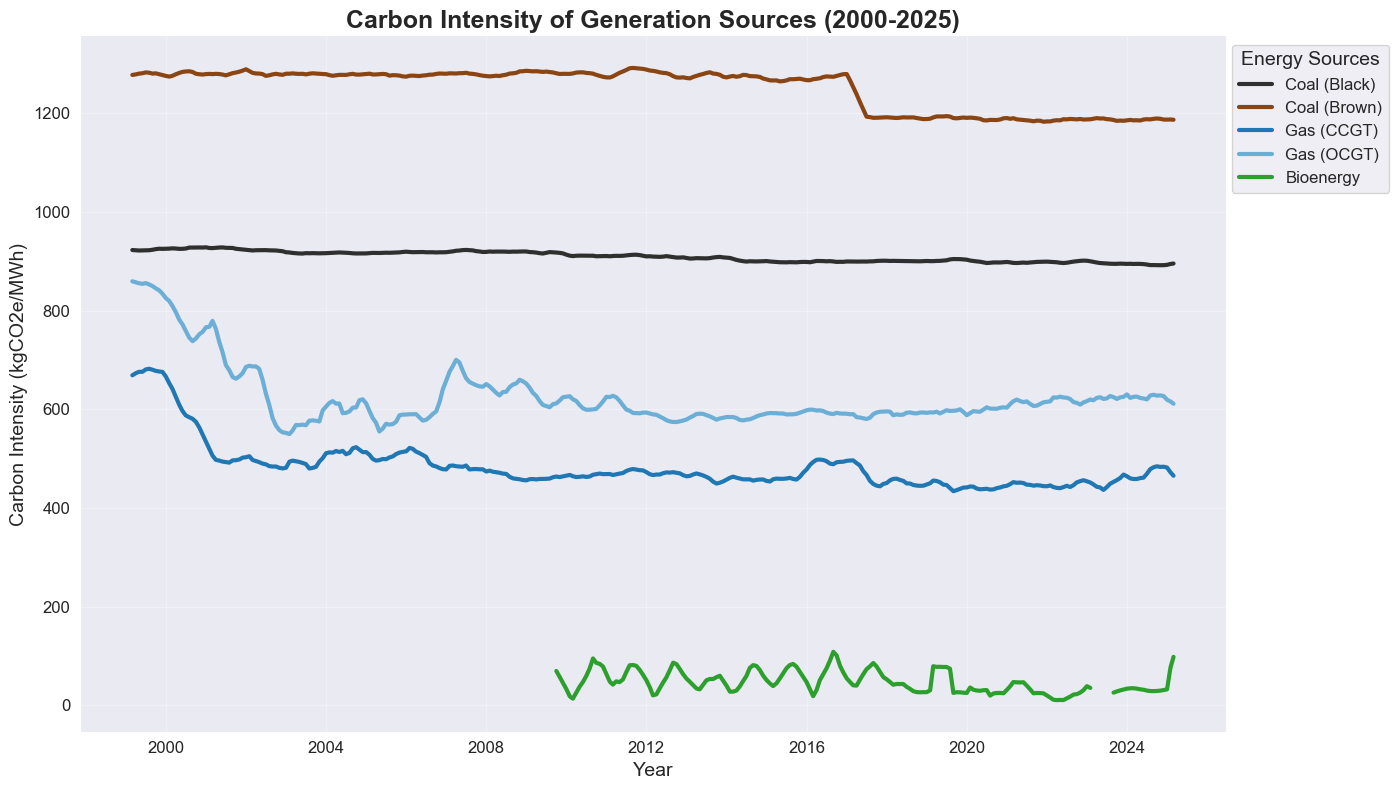

In [7]:
# 1. Define matching GWh and tCO2e columns by source
pairs = {
    "Coal (Black)": ["Coal (Black) -  GWh", "Coal (Black) Emissions Vol - tCO₂e"],
    "Coal (Brown)": ["Coal (Brown) -  GWh", "Coal (Brown) Emissions Vol - tCO₂e"],
    "Gas (CCGT)": ["Gas (CCGT) -  GWh", "Gas (CCGT) Emissions Vol - tCO₂e"],
    "Gas (OCGT)": ["Gas (OCGT) -  GWh", "Gas (OCGT) Emissions Vol - tCO₂e"],
    "Bioenergy": ["Bioenergy (Biomass) -  GWh", "Bioenergy (Biomass) Emissions Vol - tCO₂e"]
}

# 2. Compute emissions intensity in kgCO2e/MWh
intensity_df = pd.DataFrame(index=data.index)
for label, (gen_col, emi_col) in pairs.items():
    intensity_df[label] = (data[emi_col] / (data[gen_col] * 1000)) * 1000  # kgCO2e/MWh

# 3. Optional smoothing
smoothed = intensity_df.rolling(6, center=True).mean()

# 4. Plot
sns.set_style("dark")
plt.figure(figsize=(14, 8))
colors = {
    "Coal (Black)": "#2F2F2F",  # Dark gray for black coal
    "Coal (Brown)": "#8B4513",  # Brown for brown coal
    "Gas (CCGT)": "#1f77b4",    # Blue for CCGT gas
    "Gas (OCGT)": "#6baed6",    # Lighter blue for OCGT gas
    "Bioenergy": "#2ca02c"      # Green for bioenergy
}

# 6. Plot each line with custom styling
for source in smoothed.columns:
    plt.plot(smoothed.index, smoothed[source], 
             label=source, 
             color=colors[source], 
             linewidth=3)
plt.title("Carbon Intensity of Generation Sources (2000-2025)", fontsize=18, weight='bold')
plt.ylabel("Carbon Intensity (kgCO2e/MWh)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title="Energy Sources", title_fontsize=14, fontsize=12, loc='upper right', bbox_to_anchor=(1.15, 1))
sns.despine()
plt.tight_layout()
plt.show()

## 🔍 Emissions Intensity: Key Observations

### 1. **Coal**
- **Brown Coal**: ~1200 kgCO₂e/MWh  
  → 🔥 Highest intensity, very carbon-heavy  
- **Black Coal**: ~900 kgCO₂e/MWh  
  → High and stable  
- Little change over time → Suggests limited fuel quality or tech improvements

---

### 2. **Gas**
- **OCGT (Open Cycle)**: ~850 → ~600  
  → Medium-high intensity, improving over time  
- **CCGT (Combined Cycle)**: ~650 → ~500  
  → Most efficient fossil fuel option  
- Shows tech-based efficiency gains

---

### 3. **Bioenergy**
- Starts very low (~100–200 kgCO₂e/MWh)  
- Highly variable → Likely due to low generation scale + inconsistent feedstock

---

## 📈 Trend Summary

| Source       | Intensity    | Trend          | Notes                                 |
|--------------|--------------|----------------|---------------------------------------|
| **Brown Coal**   | 🔥 Highest    | Flat           | Dirtiest, no major shift              |
| **Black Coal**   | High         | Slight decline | Still heavy emissions                 |
| **OCGT (Gas)**   | Medium       | Declining      | Efficiency improving                  |
| **CCGT (Gas)**   | Low–Mid      | Stable         | Best fossil fuel efficiency           |
| **Bioenergy**    | Very Low     | Noisy          | Clean but inconsistent & low volume   |

---

## 🧠 Interpretation

- **Gas (CCGT)** is the **cleanest fossil fuel** (~500 kgCO₂e/MWh)
- **Coal** remains the top emitter — especially **brown coal**
- Fuel switching from coal to gas → major climate benefit


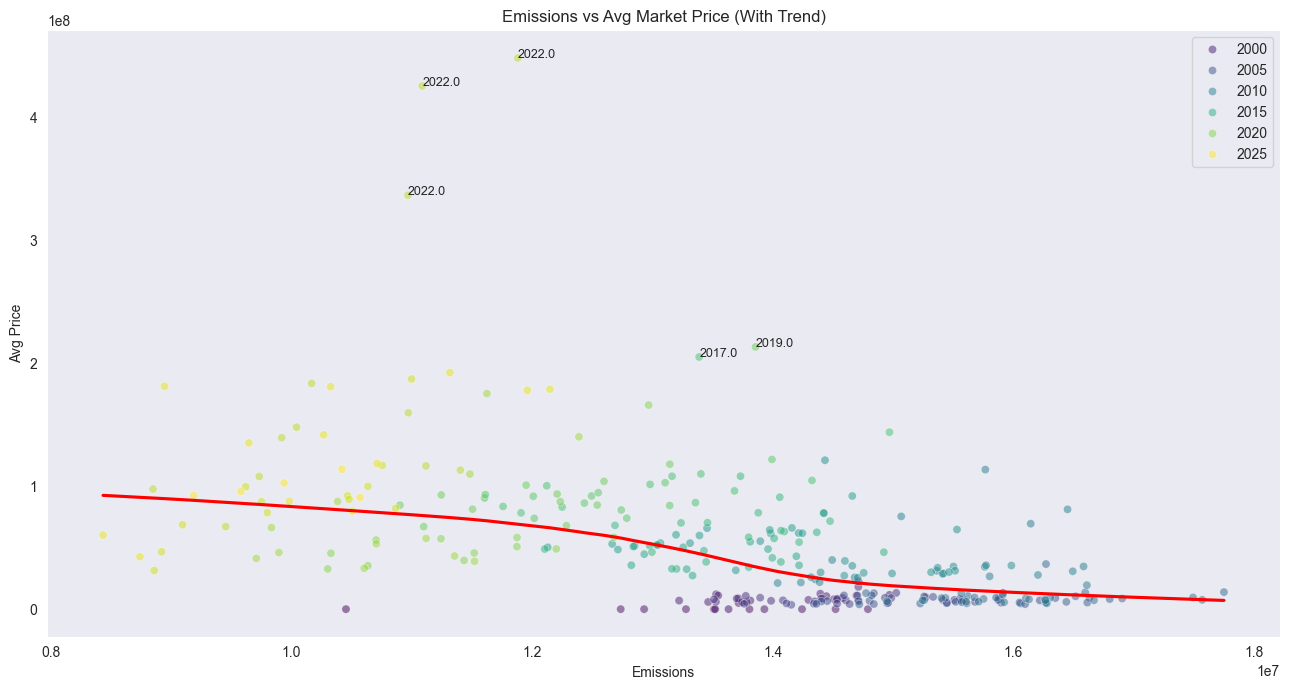

In [15]:
import statsmodels.api as sm

# Prepare long-format data
df_all = data.copy()
df_all["Year"] = df_all.index.year
df_all["Month"] = df_all.index.month
df_all["Emissions"] = data[[col for col in data.columns if col.endswith("tCO₂e")]].sum(axis=1)
df_all["Avg Price"] = data[[col for col in data.columns if col.endswith("AUD")]].mean(axis=1)

# Plot all months, all years
plt.figure(figsize=(13, 7))
sns.scatterplot(
    data=df_all,
    x="Emissions",
    y="Avg Price",
    hue="Year",
    palette="viridis",
    alpha=0.5
)

sns.regplot(
    data=df_all,
    x="Emissions",
    y="Avg Price",
    scatter=False,
    lowess=True,
    color="red",
    line_kws={"label": "LOWESS Trend"}
)
top = df_all.nlargest(5, "Avg Price")
for i, row in top.iterrows():
    plt.text(row["Emissions"], row["Avg Price"], f"{row['Year']}", fontsize=9)

plt.legend()
plt.title("Emissions vs Avg Market Price (With Trend)")
plt.tight_layout()
plt.show()



## 📊 Visualization Analysis

### Time Series Plot (Energy Output, Emissions, Market Value)

#### What it shows well:
- **Longitudinal Trends**: Clearly illustrates how each energy source has evolved over 25+ years, revealing both cyclical patterns and long-term shifts in Australia's energy landscape.
- **Source Ranking**: The sorted legend effectively shows which sources dominate in each category (GWh, emissions, market value), making it easy to identify key players.

#### What it obscures:
- **Proportional Representation**: The stacked view makes it difficult to assess the relative percentage contribution of each source to the total, especially for smaller contributors that are visually compressed at the bottom of the chart.

### Carbon Intensity Visualization

#### What it shows well:
- **Emissions Efficiency**: Directly compares the carbon intensity (kgCO₂e/MWh) across different generation technologies, clearly demonstrating the significant gap between coal and cleaner alternatives.
- **Temporal Evolution**: The smoothed time series effectively shows how carbon intensity has changed over time for each generation type, revealing technological improvements (especially in gas generation).

#### What it obscures:
- **Volume Context**: The visualization equalizes all generation sources regardless of their contribution to the total energy mix. A high-intensity but low-volume source appears equally significant to a high-volume source, potentially misrepresenting overall impact.

### Emissions vs. Market Price Scatter Plot

#### What it shows well:
- **Price-Emissions Correlation**: Effectively visualizes the relationship between total emissions and market prices, including the non-linear LOWESS trend that suggests a complex relationship.
- **Temporal Context**: The year-based color coding adds a chronological dimension that helps identify when price spikes occurred relative to emissions levels.

#### What it obscures:
- **Causality**: While correlation is visible, the plot doesn't explain whether emissions drive prices, prices drive emissions, or if both are influenced by external factors (like policy changes, technology shifts, or economic conditions).

---

## 🔑 Key Takeaways

1. **Decarbonization Progress**: Australia's electricity sector shows evidence of decarbonization, particularly through efficiency improvements in gas generation and the introduction of renewables, though coal remains a significant contributor to both generation and emissions.

2. **Price-Emissions Complexity**: The relationship between emissions and electricity prices is non-linear and has evolved over time, with recent years showing some of the highest price points despite varying emission levels, suggesting market structural changes beyond simple carbon intensity factors.

3. **Technology Differentiation**: There are stark differences in carbon intensity between generation technologies, with brown coal producing approximately 2.4 times the emissions per MWh compared to combined cycle gas (CCGT), indicating significant climate benefits from fuel switching even within fossil fuel sources.